<a href="https://colab.research.google.com/github/EmmanuelChinkaka/PUS2022_EChinkaka0/blob/main/HW4/Geospatial_NYCCitiBike_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reproducible Spatial Data Analysis with pandas
Exploratory spatial data analysis of CitiBike data using pysal and geopandas

Use this notebook we examined in class 
https://github.com/fedhere/PUS2022_FBianco/blob/main/classdemo/PhillyCitiBikes_partiallyFilledNotebook.ipynb

as well as the notebooks we wrote together 
https://github.com/fedhere/PUS2022_FBianco/blob/main/classdemo/Part_I_GeospatialAnalysis_CitiBike.ipynb

# Installing geospatial libraries


In [107]:
# Installing geopandas and folium
!pip install geopandas
!pip install folium
!apt install python3-rtree 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-rtree is already the newest version (0.8.3+ds-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 12 not upgraded.


##Importing initial libraries

In [108]:
#importing libraries

# interacting with hosting site
import urllib3
from bs4 import BeautifulSoup

# getting and reading files
import os
import glob
import pandas as pd

# geospatial analysis 
from shapely.geometry import Point, LineString
import geopandas as gpd
import folium
from folium.plugins import MarkerCluster

# Need to use matplotlib colormaps to map colors to variables' values

from matplotlib import cm

import matplotlib.pyplot as plt

# 1 Working with a Shape File of Census Tracts

### 1.1 Loading Census Tract GeoJSON File


In [109]:
ct_shape = gpd.read_file("https://data.cityofnewyork.us/api/geospatial/fxpq-c8ku?method=export&format=GeoJSON")

In [110]:
ct_shape.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2165 entries, 0 to 2164
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   ntacode      2165 non-null   object  
 1   shape_area   2165 non-null   object  
 2   ntaname      2165 non-null   object  
 3   shape_leng   2165 non-null   object  
 4   boro_name    2165 non-null   object  
 5   puma         2165 non-null   object  
 6   ct2010       2165 non-null   object  
 7   boro_code    2165 non-null   object  
 8   cdeligibil   2164 non-null   object  
 9   boro_ct2010  2165 non-null   object  
 10  ctlabel      2165 non-null   object  
 11  geometry     2165 non-null   geometry
dtypes: geometry(1), object(11)
memory usage: 203.1+ KB


**In this output, we observe that there are 12 data columns. The data come in two types: objects (11 of them) and geometry (only one).**

In [111]:
#Checking the coordinate system for the geodataframe ct_shape
ct_shape.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [112]:
ct_shape.describe
ct_shape

,ntacode,shape_area,ntaname,shape_leng,boro_name,puma,ct2010,boro_code,cdeligibil,boro_ct2010,ctlabel,geometry
0,SI22,2497009.71359,West New Brighton-New Brighton-St. George,7729.01679383,Staten Island,3903,000900,5,E,5000900,9,"MULTIPOLYGON (((-74.07921 40.64343, -74.07914 ..."
1,MN19,1906016.44662,Turtle Bay-East Midtown,5534.20030825,Manhattan,3808,009800,1,I,1009800,98,"MULTIPOLYGON (((-73.96433 40.75638, -73.96479 ..."
2,MN17,1860992.68163,Midtown-Midtown South,5687.80243891,Manhattan,3807,010200,1,I,1010200,102,"MULTIPOLYGON (((-73.97124 40.76094, -73.97170 ..."
3,MN17,1864600.43538,Midtown-Midtown South,5693.03636707,Manhattan,3807,010400,1,I,1010400,104,"MULTIPOLYGON (((-73.97446 40.76229, -73.97491 ..."
4,MN17,1890907.25105,Midtown-Midtown South,5699.86064037,Manhattan,3807,011300,1,I,1011300,113,"MULTIPOLYGON (((-73.98412 40.75484, -73.98460 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
2160,QN06,2640087.92597,Jamaica Estates-Holliswood,8957.03223214,Queens,4106,045800,4,E,4045800,458,"MULTIPOLYGON (((-73.79140 40.71302, -73.79134 ..."
2161,QN61,2685779.85127,Jamaica,6936.2772582,Queens,4112,046200,4,E,4046200,462,"MULTIPOLYGON (((-73.78431 40.70793, -73.78479 ..."
2162,QN06,2591346.57809,Jamaica Estates-Holliswood,7923.92512634,Queens,4106,046600,4,E,4046600,466,"MULTIPOLYGON (((-73.78059 40.71343, -73.78178 ..."
2163,MN04,1621656.47489,Hamilton Heights,5486.85555347,Manhattan,3802,022700,1,E,1022700,227,"MULTIPOLYGON (((-73.94292 40.82326, -73.94324 ..."


## 1.2 Coordinate systems, projections, and transformations : 

### Visualizing the Census Tract boundaries colored by boroughs

the file you read in into a geodataframe, which I will call generically ```gpd``` in these instructions, contains the "boro_code" column. To color by a column value (and the column can be numerical or categorical) you pass the column name to ```gdp.plot``` as
```gdp.plot(column="columnName")```

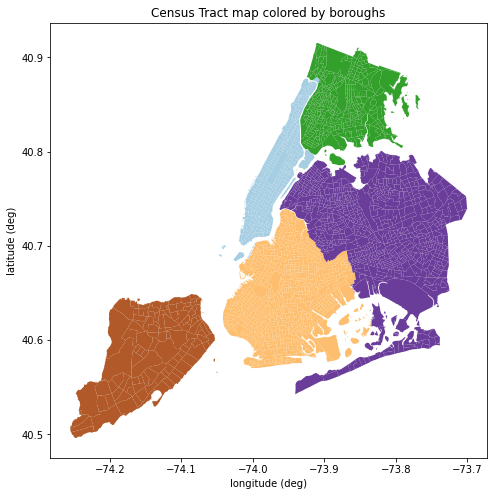

In [113]:
#Geo-visualizating the census tracts data
f, ax = plt.subplots(figsize=(8,8))
ax.set_xlabel("longitude (deg)")
ax.set_ylabel("latitude (deg)")
ct_shape.plot(column='boro_code', alpha=1, linewidth=0.5,
              ax=ax, cmap='Paired')
plt.title("Census Tract map colored by boroughs");

In [114]:
# Determining the coordinate system for the geodatabase
ct_shape.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

**The coordinate reference system of the data is EPSG: 4326, it is a world Geodetic System of 1984 and has units in degrees (LatLong)**

### Measure Areas

As discussed in class, you cannot use coordinates in latitude and longitude degree units to measure areas of polygons: you need first to project on a plane.

* Convert the coordinates of  your geodataframe, here referred to  as gpd, to a projected EPSG:2263 which is coordinated in feet, instead of lat long degrees. centered near NYC

  use 

```gpd.to_crs("EPSG:2263")```

* Extract the area of each gemetry : the geometry column has many relevant methods. use (as we did in class)

```gpd.geometry.area```

* Create a new column in your dataframe called "shape_areami2" and set it equal to the area of the polygon in miles squared. the feet to miles conversion is here 
https://www.google.com/search?sxsrf=ALeKk03B4ThQrJJXpFzoCrgRfrJ1nByPMg%3A1600870977934&ei=QVprX9muOIOl_QbOtaOwCQ&q=feet+to+mile&oq=feet+to+mile&gs_lcp=CgZwc3ktYWIQAzIICAAQsQMQkQIyAggAMgIIADICCAAyAggAMgIIADICCAAyAggAMgIIADICCAA6BAgAEEc6BAgjECc6BQgAELEDOgoIABCxAxAUEIcCUM_1AVjK-AFgzPoBaABwAngAgAFkiAHvApIBAzMuMZgBAKABAaoBB2d3cy13aXrIAQjAAQE&sclient=psy-ab&ved=0ahUKEwiZ0-GPvf_rAhWDUt8KHc7aCJYQ4dUDCA0&uact=5


* Calculate the total area of NYC in miles squared. 

* On epsg.io  look up the EPSG:2263. What is the accuracy when this projection is used in NYC?



**As expalined above, the CRS of the data is in degrees, thus not possible to project onto a 2D space. This requires a tranformation to 2D in order to be able to make any sensible demensional meausurements** 

In [115]:
#Converting the degrees into US feet. 
ct_shape = ct_shape.to_crs("EPSG:2263")
ct_shape.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

**Now that the data has been transformed into US feet, we can plot it to see this change as shown below**

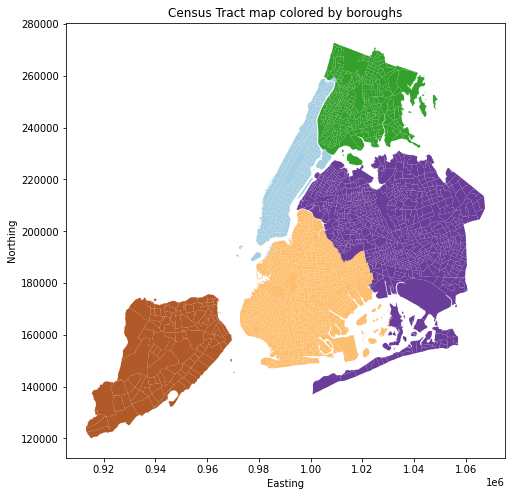

In [116]:
#Geo-visualizating the census tracts data in Feet
f, ax = plt.subplots(figsize=(8,8))
ax.set_xlabel("Easting")
ax.set_ylabel("Northing")
ct_shape.plot(column='boro_code', alpha=1, linewidth=0.5,
              ax=ax, cmap='Paired')
plt.title("Census Tract map colored by boroughs");

**Now we can be able to measure the area of each geometry object in square miles**

**Convertion factor from area feet to miles is 1: 3.587e-8**

**We create a new column called "shape_areami2" in the data. This column returns the areas of each geometry in the city in square miles**

In [117]:
#Creating a new column in the data and convert the area geometry into square miles
ct_shape["shape_areami2"] = ct_shape.geometry.area * 3.587e-8
ct_shape

,ntacode,shape_area,ntaname,shape_leng,boro_name,puma,ct2010,boro_code,cdeligibil,boro_ct2010,ctlabel,geometry,shape_areami2
0,SI22,2497009.71359,West New Brighton-New Brighton-St. George,7729.01679383,Staten Island,3903,000900,5,E,5000900,9,"MULTIPOLYGON (((962269.126 173705.500, 962288....",0.089568
1,MN19,1906016.44662,Turtle Bay-East Midtown,5534.20030825,Manhattan,3808,009800,1,I,1009800,98,"MULTIPOLYGON (((994133.507 214848.898, 994005....",0.068369
2,MN17,1860992.68163,Midtown-Midtown South,5687.80243891,Manhattan,3807,010200,1,I,1010200,102,"MULTIPOLYGON (((992216.539 216507.687, 992091....",0.066754
3,MN17,1864600.43538,Midtown-Midtown South,5693.03636707,Manhattan,3807,010400,1,I,1010400,104,"MULTIPOLYGON (((991325.882 217001.689, 991199....",0.066883
4,MN17,1890907.25105,Midtown-Midtown South,5699.86064037,Manhattan,3807,011300,1,I,1011300,113,"MULTIPOLYGON (((988650.277 214286.402, 988517....",0.067827
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2160,QN06,2640087.92597,Jamaica Estates-Holliswood,8957.03223214,Queens,4106,045800,4,E,4045800,458,"MULTIPOLYGON (((1042078.980 199118.126, 104209...",0.094700
2161,QN61,2685779.85127,Jamaica,6936.2772582,Queens,4112,046200,4,E,4046200,462,"MULTIPOLYGON (((1044049.351 197268.556, 104391...",0.096338
2162,QN06,2591346.57809,Jamaica Estates-Holliswood,7923.92512634,Queens,4106,046600,4,E,4046600,466,"MULTIPOLYGON (((1045076.166 199273.805, 104474...",0.092951
2163,MN04,1621656.47489,Hamilton Heights,5486.85555347,Manhattan,3802,022700,1,E,1022700,227,"MULTIPOLYGON (((1000046.910 239218.373, 999960...",0.058169


In [118]:
ct_shape["shape_areami2"]

0       0.089568
1       0.068369
2       0.066754
3       0.066883
4       0.067827
          ...   
2160    0.094700
2161    0.096338
2162    0.092951
2163    0.058169
2164    0.029130
Name: shape_areami2, Length: 2165, dtype: float64

In [119]:

#Calculating the total area in Square miles by adding all the areas of the geometry from the column shape_areami2 from the data
NYC_Area = (ct_shape["shape_areami2"].sum())
print ('The total New York City land area is equal to {:.0f} (mi^2)'.format(NYC_Area)) # from ft2 to mi2 #epsg=2263 is US feet


The total New York City land area is equal to 302 (mi^2)


### Choropleths of NYC

a choropleth is a map where the color of a polygon is mapped to a value. Perhaps the easiest thing to envision is to map the color to the size of the polygon. To make a choropleth of your python geodataframe (gdp) you can use, like before but this time with a numerical column:

```gdp.plot(column="theNameOfMyColumn")```

The problem is that the column has to be numeric. I want you to use "shape_area" but "shape_area" is not directly read in as a numerical column (you can tell when you run gdp.info(): it says its a type "object").

Convert gdp["shape_area"] to numeric by passing it to the pandas function

```pd.to_numeric()``` with the argument 

```error="coerce"```

https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html




In [120]:
ct_shape.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2165 entries, 0 to 2164
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   ntacode        2165 non-null   object  
 1   shape_area     2165 non-null   object  
 2   ntaname        2165 non-null   object  
 3   shape_leng     2165 non-null   object  
 4   boro_name      2165 non-null   object  
 5   puma           2165 non-null   object  
 6   ct2010         2165 non-null   object  
 7   boro_code      2165 non-null   object  
 8   cdeligibil     2164 non-null   object  
 9   boro_ct2010    2165 non-null   object  
 10  ctlabel        2165 non-null   object  
 11  geometry       2165 non-null   geometry
 12  shape_areami2  2165 non-null   float64 
dtypes: float64(1), geometry(1), object(11)
memory usage: 220.0+ KB


In [121]:
#ax = ct_shape["shape_area"]
ct_shape["shape_area"] = pd.to_numeric(ct_shape["shape_area"])
ct_shape["shape_area"]

0       2.497010e+06
1       1.906016e+06
2       1.860993e+06
3       1.864600e+06
4       1.890907e+06
            ...     
2160    2.640088e+06
2161    2.685780e+06
2162    2.591347e+06
2163    1.621656e+06
2164    8.120950e+05
Name: shape_area, Length: 2165, dtype: float64

**It is observe that the "shape_area" column has been converted to float64**

* make a coropleth using "shape_area"

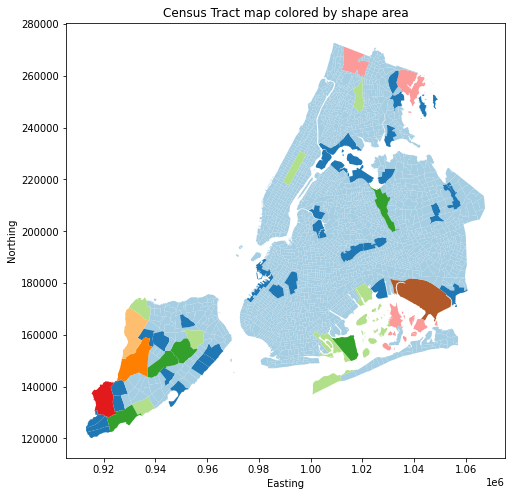

In [122]:
#Geo-visualizating the census tracts data 
f, ax = plt.subplots(figsize=(8,8))
ax.set_xlabel("Easting")
ax.set_ylabel("Northing")
ct_shape.plot(column='shape_area', alpha=1, linewidth=0.5,
              ax=ax, cmap='Paired')
plt.title("Census Tract map colored by shape area");


**Now using the column "shape_areami2" that we created above and the colors mapped the same way as above. However, checking the "shape_areami2" data type, it is numeric (float 64). As such, it does not need any conversion**  

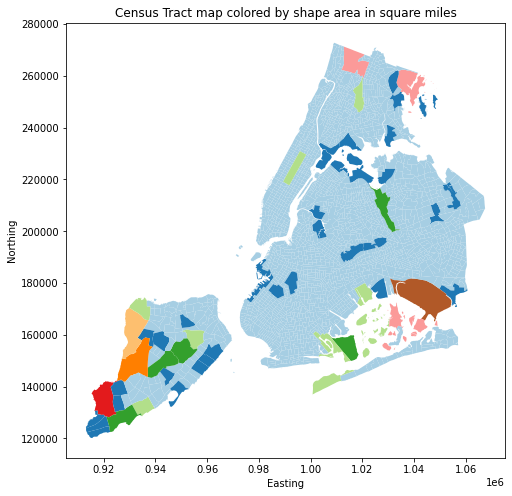

In [123]:
#Geo-visualizating the census tracts data 
f, ax = plt.subplots(figsize=(8,8))
ax.set_xlabel("Easting")
ax.set_ylabel("Northing")
ct_shape.plot(column='shape_areami2', alpha=1, linewidth=0.5,
              ax=ax, cmap='Paired')
plt.title("Census Tract map colored by shape area in square miles");

In [124]:
ct_shape[["shape_area", "shape_areami2"]]
#ct_shape["shape_area"] * 3.587e-8





,shape_area,shape_areami2
0,2.497010e+06,0.089568
1,1.906016e+06,0.068369
2,1.860993e+06,0.066754
3,1.864600e+06,0.066883
4,1.890907e+06,0.067827
...,...,...
2160,2.640088e+06,0.094700
2161,2.685780e+06,0.096338
2162,2.591347e+06,0.092951
2163,1.621656e+06,0.058169


* Now lets put some numerical values to the colors. you can do by adding the argument 

```legend=True```

 to the choropleth gdp.plot() call

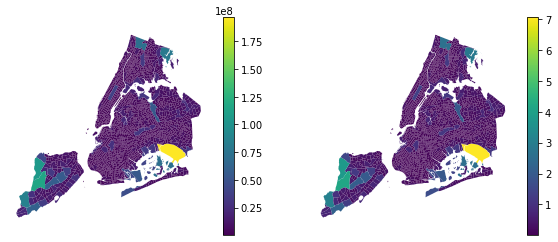

In [125]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(121)
ct_shape.plot(column="shape_area", legend=True, ax=ax)
ax.axis('off');
ax = fig.add_subplot(122)
ct_shape.plot(column="shape_areami2", legend=True, ax=ax)
ax.axis('off');

Often a more useful way to read numers associated to colors is to use quantiles. For this yuo need to install 

```mapclassify```

In [126]:
#Installing mapclassify module
!pip install mapclassify 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Use mapclassify to plot the distribution quartiles

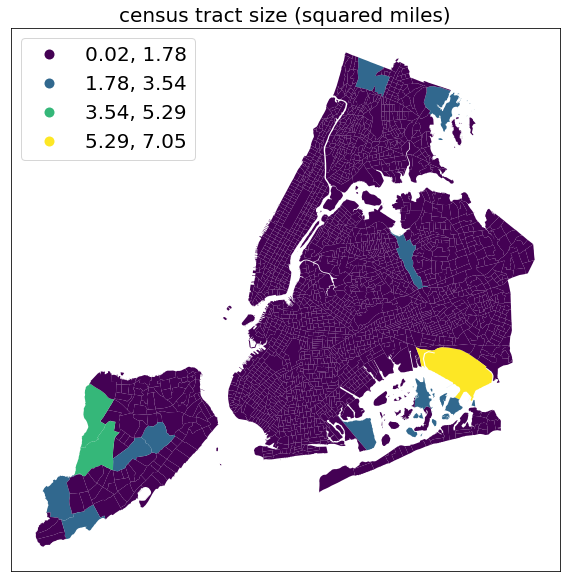

In [170]:
f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ct_shape.plot(column='shape_areami2', cmap='viridis', alpha=1,
              linewidth=0.1, ax=ax, scheme="Equal_interval", 
              legend=True, k=4, legend_kwds={'loc': 'upper left', 'fontsize':20});
plt.title("census tract size (squared miles)", fontsize=20);

(At some point i got so tired of moving the legend around that i made a whole package to plot choropleths of NYC https://github.com/fedhere/choroplethNYC )

# 2 Explore CitiBike data

### 2.1 Load CitiBike data for 9/2013

In [128]:
cb201609 = pd.read_csv('https://s3.amazonaws.com/tripdata/201609-citibike-tripdata.zip', index_col='starttime')
cb201609.head()

,tripduration,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
starttime,,,,,,,,,,,,,,
9/1/2016 00:00:02,975,9/1/2016 00:16:18,312,Allen St & Stanton St,40.722055,-73.989111,313,Washington Ave & Park Ave,40.696102,-73.967510,22609,Subscriber,1985.0,1
9/1/2016 00:00:04,1220,9/1/2016 00:20:25,316,Fulton St & William St,40.709560,-74.006536,239,Willoughby St & Fleet St,40.691966,-73.981302,16966,Subscriber,1977.0,2
9/1/2016 00:00:19,308,9/1/2016 00:05:27,479,9 Ave & W 45 St,40.760193,-73.991255,448,W 37 St & 10 Ave,40.756604,-73.997901,25601,Subscriber,1983.0,1
9/1/2016 00:00:25,250,9/1/2016 00:04:35,297,E 15 St & 3 Ave,40.734232,-73.986923,487,E 20 St & FDR Drive,40.733143,-73.975739,22094,Subscriber,1953.0,1
9/1/2016 00:00:25,439,9/1/2016 00:07:45,494,W 26 St & 8 Ave,40.747348,-73.997236,533,Broadway & W 39 St,40.752996,-73.987216,16319,Subscriber,1985.0,1


## 2.2 Explore the dataset, you know how!

In [129]:
cb201609.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender
count,1.648856e+06,1.648856e+06,1.648856e+06,1.648856e+06,1.648856e+06,1.648856e+06,1.648856e+06,1.648856e+06,1.433341e+06,1.648856e+06
mean,9.473433e+02,1.234008e+03,4.073726e+01,-7.398577e+01,1.218284e+03,4.073677e+01,-7.398573e+01,2.193483e+04,1.978361e+03,1.091918e+00
std,4.544647e+03,1.285116e+03,2.714493e-02,1.696154e-02,1.278155e+03,7.591339e-02,1.299520e-01,3.751255e+03,1.161553e+01,5.920029e-01
min,6.100000e+01,7.200000e+01,4.044535e+01,-7.402545e+01,7.200000e+01,0.000000e+00,-7.406419e+01,1.453000e+04,1.885000e+03,0.000000e+00
25%,4.070000e+02,3.470000e+02,4.071901e+01,-7.399726e+01,3.470000e+02,4.071894e+01,-7.399810e+01,1.869300e+04,1.970000e+03,1.000000e+00
50%,6.810000e+02,4.760000e+02,4.073902e+01,-7.398804e+01,4.750000e+02,4.073818e+01,-7.398848e+01,2.268600e+04,1.981000e+03,1.000000e+00
75%,1.157000e+03,3.096000e+03,4.075594e+01,-7.397649e+01,3.090000e+03,4.075514e+01,-7.397649e+01,2.532900e+04,1.987000e+03,1.000000e+00
max,1.807432e+06,3.436000e+03,4.080421e+01,-7.392850e+01,3.436000e+03,4.080421e+01,0.000000e+00,2.731600e+04,2.000000e+03,2.000000e+00


In [130]:
cb201609.info

<bound method DataFrame.info of                     tripduration            stoptime  start station id  \
starttime                                                                
9/1/2016 00:00:02            975   9/1/2016 00:16:18               312   
9/1/2016 00:00:04           1220   9/1/2016 00:20:25               316   
9/1/2016 00:00:19            308   9/1/2016 00:05:27               479   
9/1/2016 00:00:25            250   9/1/2016 00:04:35               297   
9/1/2016 00:00:25            439   9/1/2016 00:07:45               494   
...                          ...                 ...               ...   
9/30/2016 23:59:12           652  10/1/2016 00:10:04               438   
9/30/2016 23:59:17          1584  10/1/2016 00:25:42               229   
9/30/2016 23:59:27           552  10/1/2016 00:08:40               157   
9/30/2016 23:59:28          1117  10/1/2016 00:18:06              2002   
9/30/2016 23:59:51          1107  10/1/2016 00:18:18              2002   

     

## 2.3 Map CitiBike Data at the census tract level

### Create a stations dataframe with spatial info
 
this is done alrady in the notebook we reviewed in class. The steps are:

* groupby station and take the first row of wach group with 

```gdp.groupby("...").first()```

* call your new dataframe "cbstations"

In [131]:
#Group by start station ID
cbstations = cb201609.groupby("start station id").first()
cbstations.head()

,tripduration,stoptime,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
start station id,,,,,,,,,,,,,
72,944,9/1/2016 00:41:52,W 52 St & 11 Ave,40.767272,-73.993929,453,W 22 St & 8 Ave,40.744751,-73.999154,22738,Subscriber,1989.0,2
79,303,9/1/2016 07:13:30,Franklin St & W Broadway,40.719116,-74.006667,152,Warren St & Church St,40.714740,-74.009106,19043,Subscriber,1984.0,2
82,208,9/1/2016 00:46:55,St James Pl & Pearl St,40.711174,-74.000165,331,Pike St & Monroe St,40.711731,-73.991930,25627,Subscriber,1989.0,1
83,301,9/1/2016 00:44:26,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,3416,7 Ave & Park Pl,40.677615,-73.973243,18079,Subscriber,1980.0,2
116,858,9/1/2016 00:15:31,W 17 St & 8 Ave,40.741776,-74.001497,116,W 17 St & 8 Ave,40.741776,-74.001497,18605,Subscriber,1988.0,1


In [132]:
cbstations.shape

(616, 13)

### Create CitiBike station Geometry (Point) from Coordinates (Lat & Lon)

from each pair of latitude and longitude coordinates for the start station make a shapely Point object (see https://github.com/fedhere/PUS2022_FBianco/blob/main/classdemo/PhillyCitiBikes_partiallyFilledNotebook.ipynb)

In [133]:
# create a point from the latitude-longitude values of the start of the trip
cbstations['lonlat'] = cbstations.apply(lambda x:
                       Point(x['start station longitude'], x['start station latitude']), axis=1)

# create a point from the latitude-longitude values of the end of the trip
cbstations["endlonlat"] = cbstations.apply(lambda x: 
                          Point(x['end station longitude'], x['end station latitude']), axis=1)

/usr/local/lib/python3.7/dist-packages/pandas/core/dtypes/cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


In [134]:
cbstations.head()

,tripduration,stoptime,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,lonlat,endlonlat
start station id,,,,,,,,,,,,,,,
72,944,9/1/2016 00:41:52,W 52 St & 11 Ave,40.767272,-73.993929,453,W 22 St & 8 Ave,40.744751,-73.999154,22738,Subscriber,1989.0,2,POINT (-73.99392888 40.76727216),POINT (-73.99915362 40.74475148)
79,303,9/1/2016 07:13:30,Franklin St & W Broadway,40.719116,-74.006667,152,Warren St & Church St,40.714740,-74.009106,19043,Subscriber,1984.0,2,POINT (-74.00666661 40.71911552),POINT (-74.00910627 40.71473993)
82,208,9/1/2016 00:46:55,St James Pl & Pearl St,40.711174,-74.000165,331,Pike St & Monroe St,40.711731,-73.991930,25627,Subscriber,1989.0,1,POINT (-74.00016545 40.71117416),POINT (-73.99193043 40.71173107)
83,301,9/1/2016 00:44:26,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,3416,7 Ave & Park Pl,40.677615,-73.973243,18079,Subscriber,1980.0,2,POINT (-73.97632328 40.68382604),POINT (-73.97324283 40.6776147)
116,858,9/1/2016 00:15:31,W 17 St & 8 Ave,40.741776,-74.001497,116,W 17 St & 8 Ave,40.741776,-74.001497,18605,Subscriber,1988.0,1,POINT (-74.00149746 40.74177603),POINT (-74.00149746 40.74177603)


In [135]:
# create a line between the start and end positions... not so easy!
cbstations[["lonlat", "endlonlat"]].apply(lambda x:
              LineString([x["lonlat"], x["endlonlat"]]), axis=1)

/usr/local/lib/python3.7/dist-packages/pandas/core/dtypes/cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


start station id
72      LINESTRING (-73.99392888 40.76727216, -73.9991...
79      LINESTRING (-74.00666661 40.71911552, -74.0091...
82      LINESTRING (-74.00016545 40.71117416, -73.9919...
83      LINESTRING (-73.97632328 40.68382604, -73.9732...
116     LINESTRING (-74.00149746 40.74177603, -74.0014...
                              ...                        
3431    LINESTRING (-73.977885 40.746524, -73.95772297...
3432    LINESTRING (-73.976918 40.662987, -73.96841526...
3434    LINESTRING (-73.97718340158461 40.790254173304...
3435    LINESTRING (-73.99596 40.718822, -74.005138725...
3436    LINESTRING (-74.010065 40.721319, -74.00247214...
Length: 616, dtype: object

In [136]:
#Convert the dataframe into a Geodataframe, create a column in the Geodataframe with the name latlon and assigning CRS
cbstations = gpd.GeoDataFrame(cbstations)
cbstations["geometry"] = cbstations["lonlat"]

cbstations 

,tripduration,stoptime,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,lonlat,endlonlat,geometry
start station id,,,,,,,,,,,,,,,,
72,944,9/1/2016 00:41:52,W 52 St & 11 Ave,40.767272,-73.993929,453,W 22 St & 8 Ave,40.744751,-73.999154,22738,Subscriber,1989.0,2,POINT (-73.99392888 40.76727216),POINT (-73.99915362 40.74475148),POINT (-73.99393 40.76727)
79,303,9/1/2016 07:13:30,Franklin St & W Broadway,40.719116,-74.006667,152,Warren St & Church St,40.714740,-74.009106,19043,Subscriber,1984.0,2,POINT (-74.00666661 40.71911552),POINT (-74.00910627 40.71473993),POINT (-74.00667 40.71912)
82,208,9/1/2016 00:46:55,St James Pl & Pearl St,40.711174,-74.000165,331,Pike St & Monroe St,40.711731,-73.991930,25627,Subscriber,1989.0,1,POINT (-74.00016545 40.71117416),POINT (-73.99193043 40.71173107),POINT (-74.00017 40.71117)
83,301,9/1/2016 00:44:26,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,3416,7 Ave & Park Pl,40.677615,-73.973243,18079,Subscriber,1980.0,2,POINT (-73.97632328 40.68382604),POINT (-73.97324283 40.6776147),POINT (-73.97632 40.68383)
116,858,9/1/2016 00:15:31,W 17 St & 8 Ave,40.741776,-74.001497,116,W 17 St & 8 Ave,40.741776,-74.001497,18605,Subscriber,1988.0,1,POINT (-74.00149746 40.74177603),POINT (-74.00149746 40.74177603),POINT (-74.00150 40.74178)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3431,1207,9/14/2016 21:20:15,E 35 St & 3 Ave,40.746524,-73.977885,3135,E 75 St & 3 Ave,40.771129,-73.957723,25842,Subscriber,1987.0,1,POINT (-73.977885 40.746524),POINT (-73.95772297 40.77112927),POINT (-73.97789 40.74652)
3432,1441,9/22/2016 18:43:12,Bike in Movie Night | Prospect Park Bandshell,40.662987,-73.976918,282,Kent Ave & S 11 St,40.707645,-73.968415,27170,Subscriber,1986.0,2,POINT (-73.976918 40.662987),POINT (-73.96841526031494 40.707644944175705),POINT (-73.97692 40.66299)
3434,346,9/30/2016 17:32:32,W 88 St & West End Ave,40.790254,-73.977183,3360,Amsterdam Ave & W 79 St,40.782939,-73.978652,25892,Subscriber,1968.0,2,POINT (-73.97718340158461 40.79025417330419),POINT (-73.9786517 40.7829391),POINT (-73.97718 40.79025)


In [137]:
cbstations.head()

,tripduration,stoptime,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,lonlat,endlonlat,geometry
start station id,,,,,,,,,,,,,,,,
72,944,9/1/2016 00:41:52,W 52 St & 11 Ave,40.767272,-73.993929,453,W 22 St & 8 Ave,40.744751,-73.999154,22738,Subscriber,1989.0,2,POINT (-73.99392888 40.76727216),POINT (-73.99915362 40.74475148),POINT (-73.99393 40.76727)
79,303,9/1/2016 07:13:30,Franklin St & W Broadway,40.719116,-74.006667,152,Warren St & Church St,40.714740,-74.009106,19043,Subscriber,1984.0,2,POINT (-74.00666661 40.71911552),POINT (-74.00910627 40.71473993),POINT (-74.00667 40.71912)
82,208,9/1/2016 00:46:55,St James Pl & Pearl St,40.711174,-74.000165,331,Pike St & Monroe St,40.711731,-73.991930,25627,Subscriber,1989.0,1,POINT (-74.00016545 40.71117416),POINT (-73.99193043 40.71173107),POINT (-74.00017 40.71117)
83,301,9/1/2016 00:44:26,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,3416,7 Ave & Park Pl,40.677615,-73.973243,18079,Subscriber,1980.0,2,POINT (-73.97632328 40.68382604),POINT (-73.97324283 40.6776147),POINT (-73.97632 40.68383)
116,858,9/1/2016 00:15:31,W 17 St & 8 Ave,40.741776,-74.001497,116,W 17 St & 8 Ave,40.741776,-74.001497,18605,Subscriber,1988.0,1,POINT (-74.00149746 40.74177603),POINT (-74.00149746 40.74177603),POINT (-74.00150 40.74178)


In [138]:
cbstations.info

<bound method DataFrame.info of                   tripduration            stoptime  \
start station id                                     
72                         944   9/1/2016 00:41:52   
79                         303   9/1/2016 07:13:30   
82                         208   9/1/2016 00:46:55   
83                         301   9/1/2016 00:44:26   
116                        858   9/1/2016 00:15:31   
...                        ...                 ...   
3431                      1207  9/14/2016 21:20:15   
3432                      1441  9/22/2016 18:43:12   
3434                       346  9/30/2016 17:32:32   
3435                       780  9/30/2016 16:54:11   
3436                       249  9/30/2016 17:05:52   

                                             start station name  \
start station id                                                  
72                                             W 52 St & 11 Ave   
79                                     Franklin St & W Broadway 

### plot the stations

* Turn the dataframe into a geodataframe (as I did in class in the example above)

* Every geodataframe needs a geometry column: assign latlon to the "geometry"

* Set the crs to “EPSG:4326” with 
```gdp.set_crs()```

* Plot the locations of the stations

In [139]:
#assigning CRS, #Setting CRS


cbstations = cbstations.set_crs("EPSG:4326")






In [140]:
cbstations.crs 

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

convert the geometry projection to the same one you used for the NYC census tracts and replot with the census tracts map in the background


In [141]:
cbstations = cbstations.to_crs("EPSG:2263")
cbstations.crs
#ct_shape.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

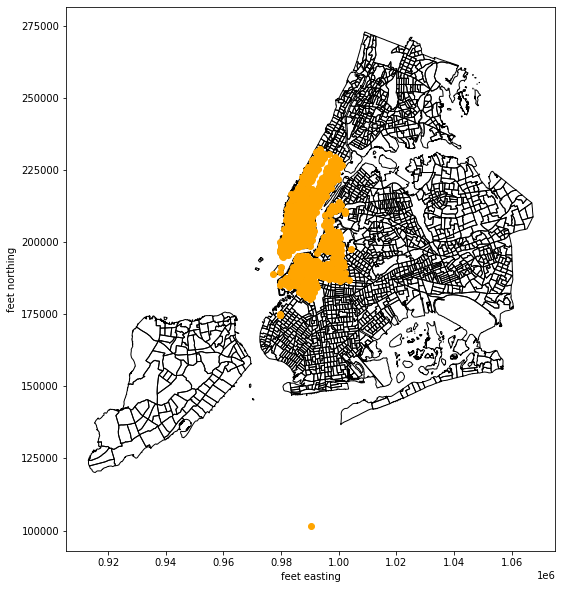

In [142]:
f, ax = plt.subplots(figsize=(10,10))
ax.set_xlabel("feet easting")
ax.set_ylabel("feet northing")
#ct_shape.boundary.plot(ax=ax, alpha=0.5)
ct_shape.plot(ax=ax, color="None", edgecolor='k')
cbstations.plot(ax=ax, c='orange');

In [100]:
cbstations.crs


<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [101]:
ct_shape.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

### cleaning data

Clearly there is an data stored incorrectly: that station at the bottom is in the water. Remove it by selecting "start station latitude" greater than some appropriate value and replot

In [148]:
cbstations["start station latitude"].min()

40.6610633719006

In [149]:
cbstations = cbstations[cbstations["start station latitude"] > 40.66]


#get only the 1-way trips
#tripdf = pds[2021][3]
#tripdf = tripdf[tripdf["trip_route_category"] == "One Way"]

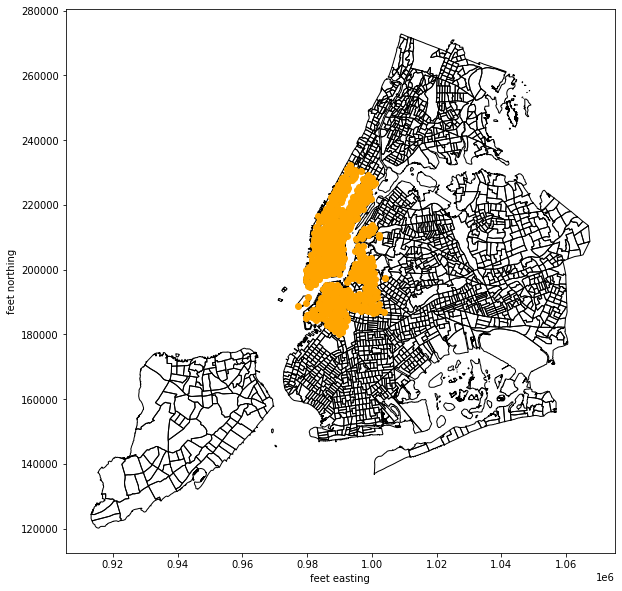

In [150]:
#replot
f, ax = plt.subplots(figsize=(10,10))
ax.set_xlabel("feet easting")
ax.set_ylabel("feet northing")
#ct_shape.boundary.plot(ax=ax, alpha=0.5)
ct_shape.plot(ax=ax, color="None", edgecolor='k')
cbstations.plot(ax=ax, c='orange');

### zoom into the relevant area 

zoom-in into the relevant area using ```ax.set_xlim()``` and ```ax.set_ylim()```

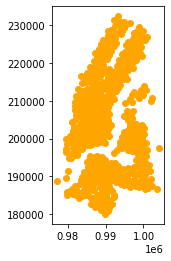

In [165]:
#replot 
f, ax = plt.subplots()
#ct_shape.plot(ax=ax, color="None", edgecolor='k')
cbstations.plot(ax=ax, c='orange');



# 3 Assigning points to polygons


## 3.1 Assign each station to a Borough

### Intrsect the census tract and citi bikes geometries manually

``` gdp.ct_shape.geometry.intersect```

First, let me do this by intersecting the shapes "manually" in a for loop. This should be transparent as far as the syntax go but it is very computationally inefficient


In [166]:
cbstations["boro_name"] = ''
# check for each citibike stations to see what CT they are belong to
for i in cbstations.index:
    a = ct_shape[ct_shape.geometry.intersects(
        cbstations.loc[i].geometry)]["boro_name"].values[0]
    
    cbstations.loc[i,'boro_name'] = a


In [167]:
cbstations.head()

,tripduration,stoptime,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,lonlat,endlonlat,geometry,boro_name
start station id,,,,,,,,,,,,,,,,,
72,944,9/1/2016 00:41:52,W 52 St & 11 Ave,40.767272,-73.993929,453,W 22 St & 8 Ave,40.744751,-73.999154,22738,Subscriber,1989.0,2,POINT (-73.99392888 40.76727216),POINT (-73.99915362 40.74475148),POINT (985931.707 218814.757),Manhattan
79,303,9/1/2016 07:13:30,Franklin St & W Broadway,40.719116,-74.006667,152,Warren St & Church St,40.714740,-74.009106,19043,Subscriber,1984.0,2,POINT (-74.00666661 40.71911552),POINT (-74.00910627 40.71473993),POINT (982402.007 201269.770),Manhattan
82,208,9/1/2016 00:46:55,St James Pl & Pearl St,40.711174,-74.000165,331,Pike St & Monroe St,40.711731,-73.991930,25627,Subscriber,1989.0,1,POINT (-74.00016545 40.71117416),POINT (-73.99193043 40.71173107),POINT (984204.132 198376.421),Manhattan
83,301,9/1/2016 00:44:26,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,3416,7 Ave & Park Pl,40.677615,-73.973243,18079,Subscriber,1980.0,2,POINT (-73.97632328 40.68382604),POINT (-73.97324283 40.6776147),POINT (990816.693 188413.578),Brooklyn
116,858,9/1/2016 00:15:31,W 17 St & 8 Ave,40.741776,-74.001497,116,W 17 St & 8 Ave,40.741776,-74.001497,18605,Subscriber,1988.0,1,POINT (-74.00149746 40.74177603),POINT (-74.00149746 40.74177603),POINT (983835.043 209525.635),Manhattan


### overplot the map locations on top of the census tract boundaries in the zoom in version (as before) but this time color the points by NYC Borough

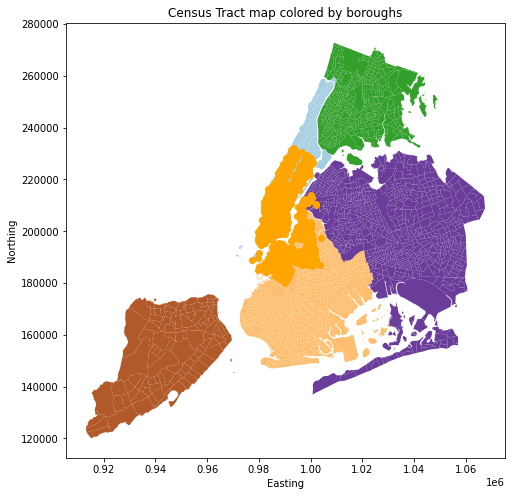

In [174]:
#Geo-visualizating the census tracts data in Feet
f, ax = plt.subplots(figsize=(8,8))
ax.set_xlabel("Easting")
ax.set_ylabel("Northing")
ct_shape.plot(column='boro_code', alpha=1, linewidth=0.5,
              ax=ax, cmap='Paired')
cbstations.plot(ax=ax, c='orange')
plt.title("Census Tract map colored by boroughs");

## 3.2 create a colopleth of NYC census tracts where the color maps to the number of citibike stations


### Perform a spatial join

Perfoming an $n \times m$ intersection test is horrifically inefficient and slow. Spatial joins use an R-tree for spatial indexing to rapidly join the tables on their geometries. 

Spatial joins operate on objects with eastings and northings, i.e., you must use two geodataframs with the same CRS, and that needs ot be a CRS expressed with dimensioned lengths. This will NOT work on data expressed in lat/long.

use 

```geopandas.tools.sjoin()``` 
passing to it ct_shape and cbstations to get a dataframe that for every station row has the census tract value in a ```boro_ct2010``` column

In [ ]:
cbstationsWct = 
cbstationsWct

,ntacode,shape_area,ntaname,shape_leng,boro_name_left,puma,ct2010,boro_code,cdeligibil,boro_ct2010,...,end station latitude,end station longitude,bikeid,usertype,birth year,gender,lonlat,boro_ct201,ct,boro_name_right
1,MN19,1.906016e+06,Turtle Bay-East Midtown,5534.20030825,Manhattan,3808,009800,1,I,1009800,...,40.771404,-73.953517,19938,Customer,1990.0,0,POINT (-73.96592976 40.75455731),Manhattan,,Manhattan
1,MN19,1.906016e+06,Turtle Bay-East Midtown,5534.20030825,Manhattan,3808,009800,1,I,1009800,...,40.720196,-73.989978,15618,Subscriber,1992.0,1,POINT (-73.967416 40.756014),Manhattan,,Manhattan
2,MN17,1.860993e+06,Midtown-Midtown South,5687.80243891,Manhattan,3807,010200,1,I,1010200,...,40.771522,-73.990541,24994,Subscriber,1965.0,1,POINT (-73.97402311 40.7597108),Manhattan,,Manhattan
2,MN17,1.860993e+06,Midtown-Midtown South,5687.80243891,Manhattan,3807,010200,1,I,1010200,...,40.760958,-73.967245,25802,Subscriber,1986.0,1,POINT (-73.972924 40.761628),Manhattan,,Manhattan
3,MN17,1.864600e+06,Midtown-Midtown South,5693.03636707,Manhattan,3807,010400,1,I,1010400,...,40.764397,-73.973715,20969,Subscriber,1986.0,1,POINT (-73.97648516 40.75992262),Manhattan,,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2142,BK99,2.740340e+07,park-cemetery-etc-Brooklyn,24250.8583554,Brooklyn,4005,017700,3,I,3017700,...,40.668132,-73.973638,19360,Customer,1979.0,0,POINT (-73.97363831 40.668132),Brooklyn,,Brooklyn
2150,MN17,2.434388e+06,Midtown-Midtown South,6254.84415438,Manhattan,3807,013700,1,I,1013700,...,40.690893,-73.996123,19425,Subscriber,1982.0,1,POINT (-73.98192338 40.7652654),Manhattan,,Manhattan
2150,MN17,2.434388e+06,Midtown-Midtown South,6254.84415438,Manhattan,3807,013700,1,I,1013700,...,40.777507,-73.988886,19303,Subscriber,1982.0,1,POINT (-73.98169333 40.76695317),Manhattan,,Manhattan
2151,MN15,1.954944e+06,Clinton,5774.68293551,Manhattan,3807,013900,1,I,1013900,...,40.764618,-73.987895,16842,Subscriber,1983.0,1,POINT (-73.988639 40.768254),Manhattan,,Manhattan


### groupby the geodataframe resulting from the spatial join grouping based on the census tract (e.g. use "boro_ct2010") and _count_ the number of station per boro_ct2010 value



### merge the geodataframe resulting from the spatial join + groupby  with the original census tract geodataframe. NOTE: you should remove the geometry column from the first dataframe before you merge cause you want the geometry to be inherited from the census tracts geodataframe. In fact, from the first geodataframe, you need _only_ one column that contains the number of stations for that geometry group

### plot the census tracts in the background (in black and white) and overplot a coropleth of the number of stations per census tract: the latter is the geodataframe you produced above plotted with the column argument set to the column name of the column that contains the number of stations information

.... YOU ARE DONE!!

In [ ]:
ctbycs = ct_shape.merge(cbstationsWct.groupby("boro_ct2010").count()[["ntacode"]], 
                        right_index=True, left_on="boro_ct2010")
ax = ct_shape.plot(ec="k", fc="w", figsize=(10,10))
ctbycs.plot(column="ntacode_y", legend=True, ax=ax)